In [5]:
import sys
sys.path.append("/Users/mathildepro/Documents/code_projects/GPU_benchmarks/code/")

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.plots import FONTSIZE, COLOR
from utils.process_results import add_benchmark_id_to_merged_timeseries, cleaning_table
import numpy as np
import time

ModuleNotFoundError: No module named 'utils'

Here we study the offset between the wattmeter data and energy scope. So
- we only study 'data.data.etotal(W)'
- we don't interpolate the wattmeter data (we need exact values)

In [80]:
repo_dir = "/Users/mathildepro/Documents/code_projects/GPU_benchmarks/" #
#repo_dir = "/home/mjay/GPU_benchmark_energy/" 
prefix = [repo_dir + "results/night_exp_20_04/", repo_dir + "results/night_exp_19_04/"]

energy_scope_df = pd.concat([pd.read_csv(file + 'es_ts.csv') for file in prefix])
watt_df = pd.concat([pd.read_csv(file + 'g5k_metrics.csv') for file in prefix])
exp_table = pd.concat([pd.read_csv(file + 'processed_table.csv') for file in prefix])

exp_table = cleaning_table(exp_table, watt_df, energy_scope_df)

[44, 48, 52, 56, 60, 64, 142, 146, 45, 49, 53, 57, 61, 65, 143, 147, 46, 50, 54, 58, 62, 66, 144, 148, 47, 51, 55, 59, 63, 67, 145, 149, 68, 71, 69, 72, 70, 73]
60    NaN
61    5.0
62    5.0
63    5.0
64    5.0
Name: timestamp_sec, dtype: float64
60    792.0
61    792.0
62    792.0
63    792.0
64    792.0
Name: bmc_node_power_watt, dtype: float64
    timestamp_sec  bmc_node_power_watt  energy(Ws)
60   1.650470e+09                792.0         NaN
61   1.650470e+09                792.0      3960.0
62   1.650470e+09                792.0      3960.0
63   1.650470e+09                792.0      3960.0
64   1.650470e+09                792.0      3960.0
65   1.650470e+09                792.0      3960.0
66   1.650470e+09                792.0      3960.0
67   1.650470e+09                792.0      3960.0
68   1.650470e+09                792.0      3960.0
69   1.650470e+09                792.0      3960.0
70   1.650470e+09                792.0      3960.0
71   1.650470e+09                792.0 

In [81]:
exp_table[exp_table['tool_name']=="energy scope"].gpu_0_benchmark_id.unique()[:5]

array(['768_1_0', '768_1_1', '768_1_2', '768_1_3', '448_0_0'],
      dtype=object)

In [82]:
watt_df[:15]

timestamp  wattmetre_power_watt  timestamp_sec  \
0   2022-04-20T17:49:26+02:00            980.684000   1.650470e+09   
1   2022-04-20T17:49:27+02:00            982.632000   1.650470e+09   
2   2022-04-20T17:49:28+02:00            986.702000   1.650470e+09   
3   2022-04-20T17:49:29+02:00            992.560000   1.650470e+09   
4   2022-04-20T17:49:30+02:00            995.308000   1.650470e+09   
5   2022-04-20T17:49:31+02:00           1000.560606   1.650470e+09   
6   2022-04-20T17:49:32+02:00           1000.604000   1.650470e+09   
7   2022-04-20T17:49:33+02:00           1002.318000   1.650470e+09   
8   2022-04-20T17:49:34+02:00           1004.771000   1.650470e+09   
9   2022-04-20T17:49:35+02:00           1002.430000   1.650470e+09   
10  2022-04-20T17:49:36+02:00           1002.494000   1.650470e+09   
11  2022-04-20T17:49:37+02:00            999.670000   1.650470e+09   
12  2022-04-20T17:49:38+02:00            979.869000   1.650470e+09   
13  2022-04-20T17:49:39+02:00            954.582000   1.650470e+09   
14  2022-04-20T17:49:40+02:00            929.890000   1.650470e+09   

    bmc_node_power_watt  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
5                   NaN  
6                   NaN  
7                   NaN  
8                   NaN  
9                   NaN  
10                  NaN  
11                  NaN  
12                  NaN  
13                  NaN  
14                  NaN

In [83]:
grouped_watt_df = watt_df.groupby(by=['timestamp_sec']).mean().reset_index()
grouped_watt_df['timestamp'] = pd.to_datetime(grouped_watt_df['timestamp_sec'].apply(lambda x: time.asctime(time.localtime(x))))
grouped_watt_df[:15]

timestamp_sec  wattmetre_power_watt  bmc_node_power_watt  \
0    1.650389e+09              1007.095                900.0   
1    1.650389e+09              1010.934                  NaN   
2    1.650389e+09              1013.723                  NaN   
3    1.650389e+09              1015.789                  NaN   
4    1.650389e+09              1015.270                  NaN   
5    1.650389e+09              1015.574                900.0   
6    1.650389e+09              1016.959                  NaN   
7    1.650389e+09              1016.043                  NaN   
8    1.650389e+09              1016.135                  NaN   
9    1.650389e+09              1003.961                  NaN   
10   1.650389e+09               980.585                828.0   
11   1.650389e+09               951.804                  NaN   
12   1.650389e+09               928.217                  NaN   
13   1.650389e+09               908.999                  NaN   
14   1.650389e+09               909.655                  NaN   

             timestamp  
0  2022-04-19 19:26:44  
1  2022-04-19 19:26:45  
2  2022-04-19 19:26:46  
3  2022-04-19 19:26:47  
4  2022-04-19 19:26:48  
5  2022-04-19 19:26:49  
6  2022-04-19 19:26:50  
7  2022-04-19 19:26:51  
8  2022-04-19 19:26:52  
9  2022-04-19 19:26:53  
10 2022-04-19 19:26:54  
11 2022-04-19 19:26:55  
12 2022-04-19 19:26:56  
13 2022-04-19 19:26:57  
14 2022-04-19 19:26:58

# Merge

In [84]:
merged_df = pd.merge(energy_scope_df[['timestamp_sec','data.data.etotal(W)']],grouped_watt_df, on='timestamp_sec', how='outer').sort_values(by=['timestamp_sec'])
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp_sec'].apply(lambda x: time.asctime(time.localtime(x))))

# compute offset
merged_df['wattmetre_es_diff'] = abs(merged_df['wattmetre_power_watt'] - merged_df['data.data.etotal(W)'])
merged_df['bmc_es_diff'] = abs(merged_df['bmc_node_power_watt'] - merged_df['data.data.etotal(W)'])

In [85]:
merged_df[:15]

timestamp_sec  data.data.etotal(W)  wattmetre_power_watt  \
130136   1.650389e+09                  NaN              1007.095   
130137   1.650389e+09                  NaN              1010.934   
13293    1.650389e+09              638.859              1013.723   
13294    1.650389e+09              638.859                   NaN   
13295    1.650389e+09              633.505              1015.789   
13296    1.650389e+09              633.842                   NaN   
13297    1.650389e+09              633.483              1015.270   
13298    1.650389e+09              634.702                   NaN   
13299    1.650389e+09              634.073              1015.574   
13300    1.650389e+09              632.930                   NaN   
13301    1.650389e+09              634.147              1016.959   
13302    1.650389e+09              633.926                   NaN   
13303    1.650389e+09              634.606              1016.043   
13304    1.650389e+09              633.655                   NaN   
13305    1.650389e+09              633.683              1016.135   

        bmc_node_power_watt           timestamp  wattmetre_es_diff  \
130136                900.0 2022-04-19 19:26:44                NaN   
130137                  NaN 2022-04-19 19:26:45                NaN   
13293                   NaN 2022-04-19 19:26:46            374.864   
13294                   NaN 2022-04-19 19:26:46                NaN   
13295                   NaN 2022-04-19 19:26:47            382.284   
13296                   NaN 2022-04-19 19:26:47                NaN   
13297                   NaN 2022-04-19 19:26:48            381.787   
13298                   NaN 2022-04-19 19:26:48                NaN   
13299                 900.0 2022-04-19 19:26:49            381.501   
13300                   NaN 2022-04-19 19:26:49                NaN   
13301                   NaN 2022-04-19 19:26:50            382.812   
13302                   NaN 2022-04-19 19:26:50                NaN   
13303                   NaN 2022-04-19 19:26:51            381.437   
13304                   NaN 2022-04-19 19:26:51                NaN   
13305                   NaN 2022-04-19 19:26:52            382.452   

        bmc_es_diff  
130136          NaN  
130137          NaN  
13293           NaN  
13294           NaN  
13295           NaN  
13296           NaN  
13297           NaN  
13298           NaN  
13299       265.927  
13300           NaN  
13301           NaN  
13302           NaN  
13303           NaN  
13304           NaN  
13305           NaN

In [86]:
b_df = add_benchmark_id_to_merged_timeseries(exp_table, merged_df, time_before_start=0, time_after_end=0)

Filter the beggining and the end

## Histogramme

idle sh
mg D
lu D
ep E


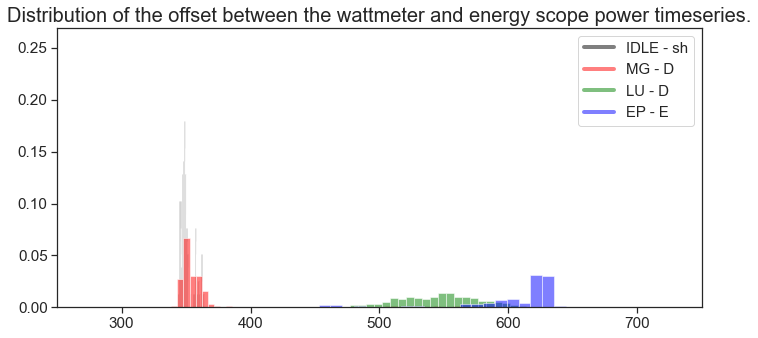

In [87]:
import itertools

FONTSIZE=20
COLOR=['black', 'red', 'green', 'blue']
stat_cols = None
plot_limits=None 
if_col_legend=True 
if_bench_legend=True
bbox_to_anchor=(0,1)
loc='upper left'
nb_cols=1

bench_idx = exp_table.set_index(['gpu_0_appli','gpu_0_appli_class']).index.unique()
exp_number = 1
if exp_number%nb_cols:
    nb_rows = exp_number//nb_cols+1
else:
    nb_rows = exp_number//nb_cols

FIGSIZE = (10,5)
fig, axes = plt.subplots(
    nrows=nb_rows, 
    ncols=nb_cols, 
    sharex=False, 
    sharey=True, 
    figsize=FIGSIZE,
)
color = itertools.cycle(COLOR)
legend = {'colors':[], 'values':[]}

for i in range(len(bench_idx)):
    c=next(color)
    appli = bench_idx[i][0]
    appli_class = bench_idx[i][1]
    print(appli, appli_class)
    legend_value = "{} - {}".format(appli.upper(), appli_class)
    legend['colors'].append(c)
    legend['values'].append(legend_value)
    exp_ids = exp_table[(
        exp_table['gpu_0_appli']==appli)&(
        exp_table['gpu_0_appli_class']==appli_class)&(
        exp_table['tool_name']=='energy scope'
    )]['gpu_0_benchmark_id'].values

    axes.hist(
        b_df[b_df['benchmark_id'].isin(exp_ids)].wattmetre_es_diff.dropna().values,
        bins=200,
        color=c,
        alpha=0.5,
        density=True,
    )


from matplotlib.lines import Line2D

color_lines = [Line2D([0], [0], color=c, linewidth=4, alpha=0.5) for c in legend['colors']]

axes.legend(
    color_lines, 
    legend['values'], 
    bbox_to_anchor=(1, 1), 
    fontsize=15,
)

axes.set_xlim((250,750))
axes.set_title("Distribution of the offset between the wattmeter and energy scope power timeseries.",fontsize=FONTSIZE)
fig.tight_layout()

## Power / Power graph

idle sh
mg D
lu D
ep E


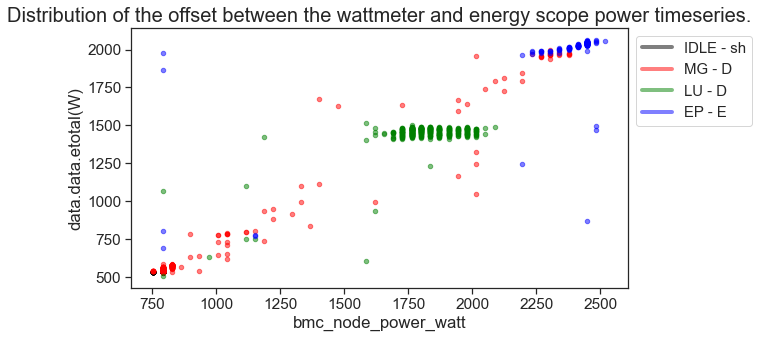

In [88]:
import itertools

FONTSIZE=20
COLOR=['black', 'red', 'green', 'blue']
stat_cols = None
plot_limits=None 
if_col_legend=True 
if_bench_legend=True
bbox_to_anchor=(0,1)
loc='upper left'
nb_cols=1

bench_idx = exp_table.set_index(['gpu_0_appli','gpu_0_appli_class']).index.unique()
exp_number = 1
if exp_number%nb_cols:
    nb_rows = exp_number//nb_cols+1
else:
    nb_rows = exp_number//nb_cols

FIGSIZE = (10,5)
fig, axes = plt.subplots(
    nrows=nb_rows, 
    ncols=nb_cols, 
    sharex=False, 
    sharey=True, 
    figsize=FIGSIZE,
)
color = itertools.cycle(COLOR)
legend = {'colors':[], 'values':[]}

for i in range(len(bench_idx)):
    c=next(color)
    appli = bench_idx[i][0]
    appli_class = bench_idx[i][1]
    print(appli, appli_class)
    legend_value = "{} - {}".format(appli.upper(), appli_class)
    legend['colors'].append(c)
    legend['values'].append(legend_value)
    exp_ids = exp_table[(
        exp_table['gpu_0_appli']==appli)&(
        exp_table['gpu_0_appli_class']==appli_class)&(
        exp_table['tool_name']=='energy scope'
    )]['gpu_0_benchmark_id'].values
    b_df[b_df['benchmark_id'].isin(exp_ids)].plot.scatter(
        ax=axes,
        x='bmc_node_power_watt', #wattmetre_power_watt
        y='data.data.etotal(W)',
        color=c,
        alpha=0.5,
    )


from matplotlib.lines import Line2D

color_lines = [Line2D([0], [0], color=c, linewidth=4, alpha=0.5) for c in legend['colors']]

axes.legend(
    color_lines, 
    legend['values'], 
    bbox_to_anchor=(1, 1), 
    fontsize=15,
)
axes.set_title("Distribution of the offset between the wattmeter and energy scope power timeseries.",fontsize=FONTSIZE)
fig.tight_layout()

In [89]:
b_df[b_df['benchmark_id'].isin(['483_0_1','483_0_0'])]

Empty DataFrame
Columns: [timestamp_sec, data.data.etotal(W), wattmetre_power_watt, bmc_node_power_watt, timestamp, wattmetre_es_diff, bmc_es_diff, sec, benchmark_id, benchmark_appli]
Index: []

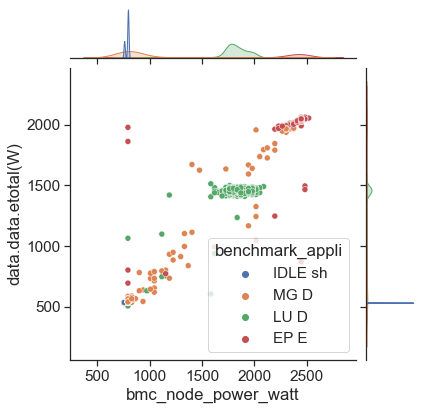

In [90]:
import seaborn as sns
sns.jointplot(
    data=b_df.dropna(subset=["bmc_node_power_watt", 'data.data.etotal(W)']).reset_index(), 
    x="bmc_node_power_watt",
    y='data.data.etotal(W)',
    hue='benchmark_appli',
    )

Regression: BMC = 1.0937004477307142 x Energy Scope + 216.0347542230445
Text(0, 0, 'EP E')
Regression: Ext. power meter = 1.1639006193916028 x Energy Scope + 281.8582777165393
Text(0, 0, 'EP E')
Regression: Ext. power meter = 1.0466685480773594 x BMC + 79.98670714030663
Text(0, 0, 'EP E')


<Figure size 1440x1440 with 0 Axes>

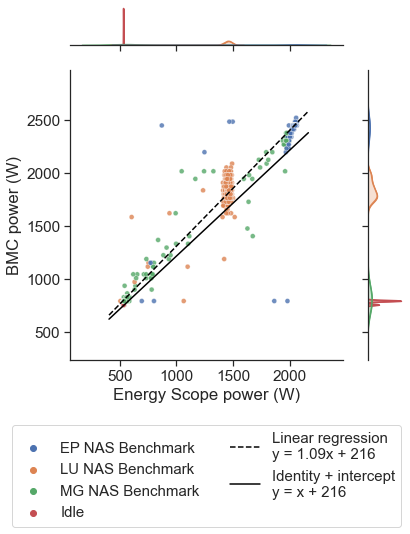

<Figure size 1440x1440 with 0 Axes>

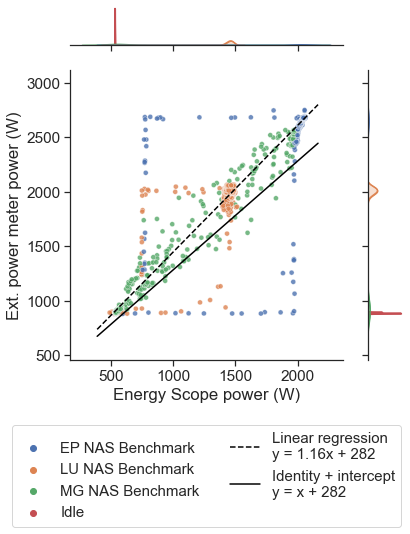

<Figure size 1440x1440 with 0 Axes>

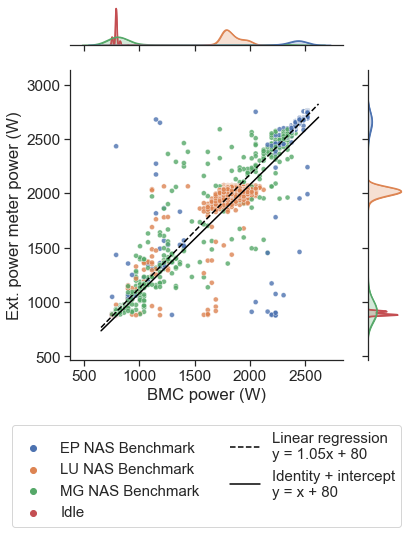

In [114]:
def regression_joint_plot(df, vertical_col, horizontal_col):
    # Regression

    from sklearn import linear_model

    plot_df = df.dropna(subset=[horizontal_col['col'], vertical_col['col']]).reset_index()
    X = plot_df[[horizontal_col['col']]]
    y = plot_df[vertical_col['col']]

    model = linear_model.LinearRegression()
    results = model.fit(X, y)

    plt.figure(figsize=(20,20))
    sns.set_context("paper")
    sns.set(font_scale = 1.4)
    sns.set_style("ticks")
    grid = sns.jointplot(
        data=plot_df, 
        x=horizontal_col['col'],
        y=vertical_col['col'],
        hue='benchmark_appli',
        hue_order=['EP E', 'LU D', 'MG D', 'IDLE sh'],
        s=25, alpha=.8
        )
    #grid.plot_joint(sns.scatterplot,)
    # grid.plot_joint(sns.kdeplot, zorder=0, 
    #     #levels=6, thresh=0.0001,
    #     levels=[.0001, .0005, .001, .005, .01, .05],
    #     )
    grid.plot_marginals(sns.kdeplot)
    grid.set_axis_labels('{} power (W)'.format(horizontal_col['name']), '{} power (W)'.format(vertical_col['name'])) #, fontsize=16)

    the_x = plot_df[horizontal_col['col']].sort_values().values
    the_x = np.concatenate([np.array([the_x[0]-100]),the_x, np.array([the_x[-1]+100])])
    the_y = the_x + results.intercept_ #the_x - 452
    the_z = results.coef_[0]*the_x + results.intercept_
    print("Regression: {} = {} x {} + {}".format(vertical_col['name'], results.coef_[0], horizontal_col['name'], results.intercept_))

    suptitle_text = "\ny = {}x + {}".format( round(results.coef_[0], 2), round(results.intercept_), 2)
    # vertical_col['name'], horizontal_col['name'], 
    grid.fig.axes[0].plot(
        the_x,
        the_z, 
        linestyle='--', 
        color='black',
        label='Linear regression'+suptitle_text,
    )
    grid.fig.axes[0].plot(
        the_x,
        the_y, 
        linestyle='-', 
        color='black',
        label='Identity + intercept\ny = x + {}'.format(round(results.intercept_)),
    )
    # dummy plot to adapt legend
    grid.fig.axes[0].plot(
        [1000],
        [1000], 
        color='w',
        alpha=0,
        label=' ',
    )

    grid.figure.tight_layout() 
    # grid.figure.suptitle(
    #     suptitle_text, 
    #     horizontalalignment="center", 
    #     verticalalignment="baseline", 
    #     y=1.01,
    #     ) 
    #sns.despine(left=True, bottom=True)

    new_labels = [
            'EP NAS Benchmark', 
            'LU NAS Benchmark', 
            'MG NAS Benchmark', 
            'Idle', 
            'Linear regression'+suptitle_text,
            'Identity + intercept\ny = x + {}'.format(round(results.intercept_)), 
        ]


    leg = grid.fig.axes[0].legend(
        bbox_to_anchor=(0.5,-0.2),
        loc='upper center',
        ncol=2,
        fontsize=15,
        ) #.remove()

    print(leg.texts[0])
    for t, l in zip(
        leg.texts, 
        new_labels
        ):
        t.set_text(l)

    grid.fig.savefig(
        "/Users/mathildepro/Documents/code_projects/GPU_benchmarks/graphes/offset.pdf",
        bbox_inches='tight',
        )
    # for i in range(len(grid.fig.axes[0].legend().texts)):
    #     grid.fig.axes[0].legend().texts[i].set_text(new_labels[i])
    #     print(grid.fig.axes[0].legend().texts[i])

    #grid.ax_marg_x.set_xlim(min(the_x))
    #grid.ax_marg_y.set_ylim(min(the_y))

regression_joint_plot(b_df, {"col": "bmc_node_power_watt", "name":"BMC"}, {"col": "data.data.etotal(W)", "name":"Energy Scope"})
regression_joint_plot(b_df, {"col": "wattmetre_power_watt", "name":"Ext. power meter"}, {"col": "data.data.etotal(W)", "name":"Energy Scope"})
regression_joint_plot(b_df, {"col": "wattmetre_power_watt", "name":"Ext. power meter"}, {"col": "bmc_node_power_watt", "name":"BMC"})

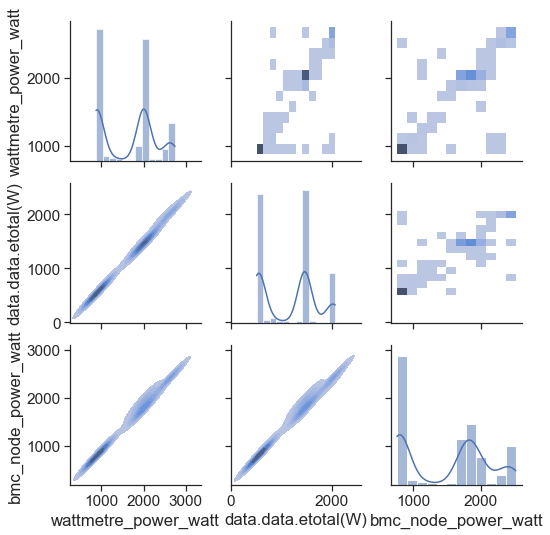

In [102]:
plot_df = b_df.dropna(subset=["wattmetre_power_watt", 'data.data.etotal(W)', 'bmc_node_power_watt'])[["wattmetre_power_watt", 'data.data.etotal(W)', 'bmc_node_power_watt']].reset_index(drop=True)

g = sns.PairGrid(
    data=plot_df,
    )
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

# Correlation

In [103]:
plot_df = b_df.dropna(subset=["wattmetre_power_watt", 'data.data.etotal(W)','bmc_node_power_watt'])[["wattmetre_power_watt", 'data.data.etotal(W)','bmc_node_power_watt']].reset_index(drop=True)
plot_df.corr()

wattmetre_power_watt  data.data.etotal(W)  \
wattmetre_power_watt              1.000000             0.978570   
data.data.etotal(W)               0.978570             1.000000   
bmc_node_power_watt               0.978214             0.980356   

                      bmc_node_power_watt  
wattmetre_power_watt             0.978214  
data.data.etotal(W)              0.980356  
bmc_node_power_watt              1.000000

# Let's remove the up and down 
by cutting the first and last 4 seconds

In [104]:
b_df.columns

Index(['timestamp_sec', 'data.data.etotal(W)', 'wattmetre_power_watt',
       'bmc_node_power_watt', 'timestamp', 'wattmetre_es_diff', 'bmc_es_diff',
       'sec', 'benchmark_id', 'benchmark_appli'],
      dtype='object')

In [105]:
b_df_cut = add_benchmark_id_to_merged_timeseries(exp_table, merged_df, time_before_start=-3, time_after_end=-3)

Regression: Ext. power meter = 1.1813021912048554 x Energy Scope + 260.33767506779554
Text(0, 0, 'EP E')


<Figure size 1440x1440 with 0 Axes>

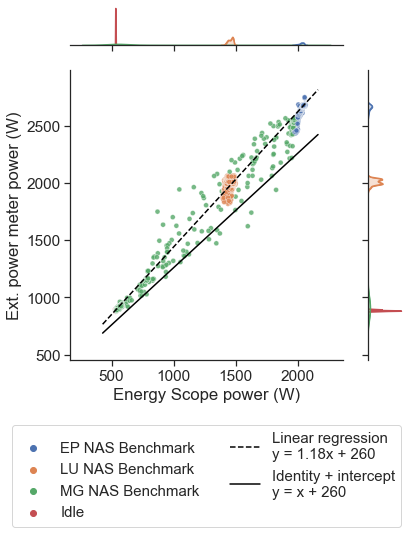

In [115]:
regression_joint_plot(b_df_cut, {"col": "wattmetre_power_watt", "name":"Ext. power meter"}, {"col": "data.data.etotal(W)", "name":"Energy Scope"})